                       Date    Open    High     Low   Close  % Change  \
0 2022-05-17 04:00:00+00:00  202.12  205.46  198.36  202.62    1.2900   
1 2022-05-18 04:00:00+00:00  200.00  201.00  191.63  192.24   -5.1200   
2 2022-05-19 04:00:00+00:00  191.20  195.29  189.60  191.29   -0.4942   
3 2022-05-20 04:00:00+00:00  194.97  197.91  187.87  193.54    1.1800   
4 2022-05-23 04:00:00+00:00  195.19  196.99  191.24  196.23    1.3900   

   % Change vs Average      Volume  
0               1.0700  24,872,729  
1              -5.3400  23,959,966  
2              -0.7116  24,446,938  
3               0.9588  31,465,570  
4               1.1700  25,059,161  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


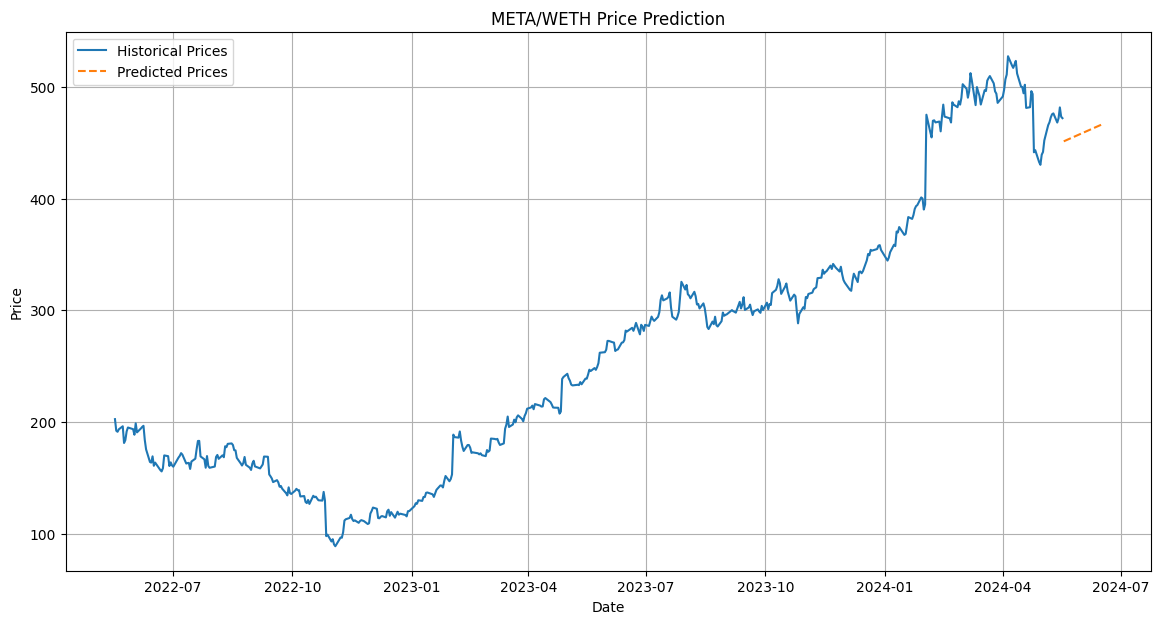

                        Date  Predicted_Price
0  2024-05-18 04:00:00+00:00       451.191848
1  2024-05-19 04:00:00+00:00       451.705162
2  2024-05-20 04:00:00+00:00       452.218476
3  2024-05-21 04:00:00+00:00       452.731789
4  2024-05-22 04:00:00+00:00       453.245103
5  2024-05-23 04:00:00+00:00       453.758417
6  2024-05-24 04:00:00+00:00       454.271731
7  2024-05-25 04:00:00+00:00       454.785044
8  2024-05-26 04:00:00+00:00       455.298358
9  2024-05-27 04:00:00+00:00       455.811672
10 2024-05-28 04:00:00+00:00       456.324986
11 2024-05-29 04:00:00+00:00       456.838300
12 2024-05-30 04:00:00+00:00       457.351613
13 2024-05-31 04:00:00+00:00       457.864927
14 2024-06-01 04:00:00+00:00       458.378241
15 2024-06-02 04:00:00+00:00       458.891555
16 2024-06-03 04:00:00+00:00       459.404868
17 2024-06-04 04:00:00+00:00       459.918182
18 2024-06-05 04:00:00+00:00       460.431496
19 2024-06-06 04:00:00+00:00       460.944810
20 2024-06-07 04:00:00+00:00      

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import timedelta

# Define the correct URL to the raw CSV file
url = 'https://raw.githubusercontent.com/sydneymcolumbia/Stock-Analysis/main/META%20(20240517000000000%20_%2020220517000000000).csv'

# Load the dataset from the URL
data = pd.read_csv(url, parse_dates=['Date'])

# Display the first few rows of the dataframe
print(data.head())

# Ensure the data is sorted by date
data = data.sort_values(by='Date')

# Create features for the model
data['Day'] = (data['Date'] - data['Date'].min()).dt.days

# Prepare the training data
X = data[['Day']]
y = data['Close']

# Train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict future prices
future_days = 30
last_day = data['Day'].max()
future_X = np.array([last_day + i for i in range(1, future_days + 1)]).reshape(-1, 1)
predictions = model.predict(future_X)

# Create a DataFrame for future predictions
future_dates = [data['Date'].max() + timedelta(days=i) for i in range(1, future_days + 1)]
pred_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': predictions})

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Historical Prices')
plt.plot(pred_df['Date'], pred_df['Predicted_Price'], label='Predicted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('META Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Save the predictions
pred_df.to_csv('meta_weth_predictions.csv', index=False)

print(pred_df)
